In [46]:
import numpy as np
import pandas as pd
import scanpy as sc
import muon as mu

#requires python 3.9.1

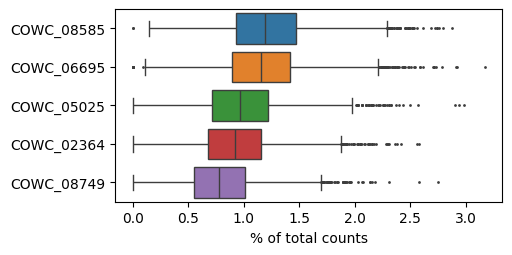

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


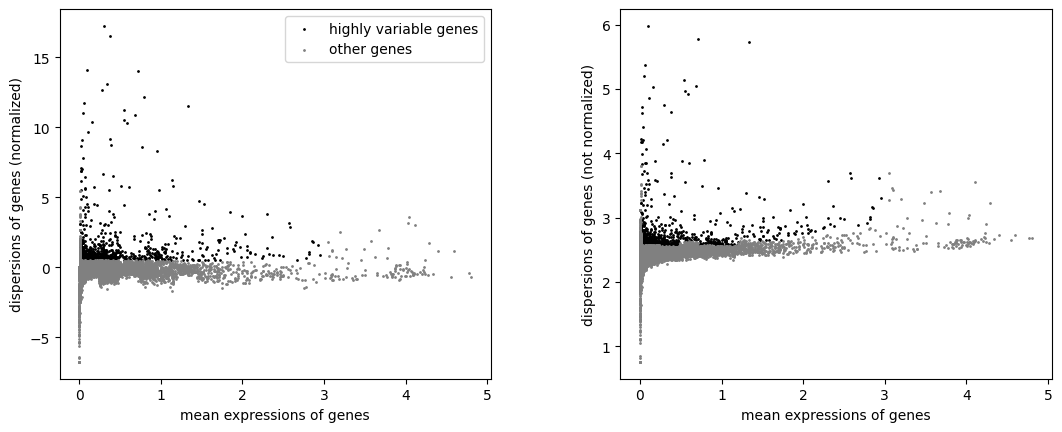

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [65]:
#capaspora gex clustering


adata = sc.read_10x_mtx("/Users/work/Library/Mobile Documents/com~apple~CloudDocs/Desktop/ADesktop/Studium/PhD/unicellulars/capsaspora_gex/raw_feature_bc_matrix")
sc.pp.filter_cells(adata,min_counts=500)
sc.pp.filter_cells(adata,max_counts=8000)

sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pl.highest_expr_genes(adata, n_top=5)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.raw = adata #make sure you have your full "raw" adata object

adata = adata[:, adata.var.highly_variable] #only taking hvg
sc.pp.scale(adata, max_value=10)


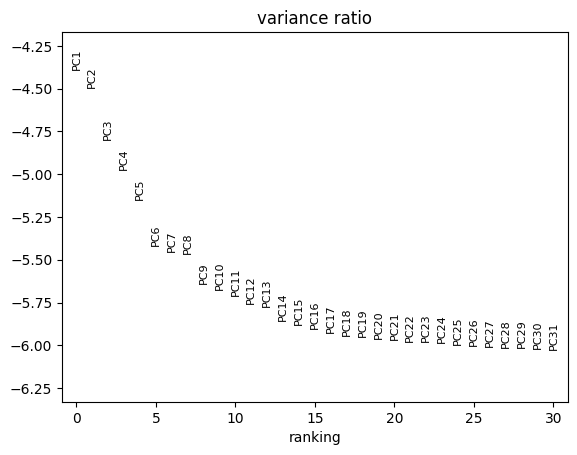

In [66]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

In [67]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


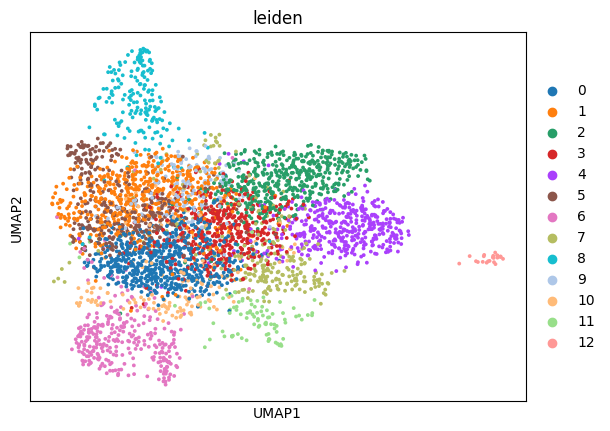

In [68]:
sc.pl.umap(adata,color="leiden")

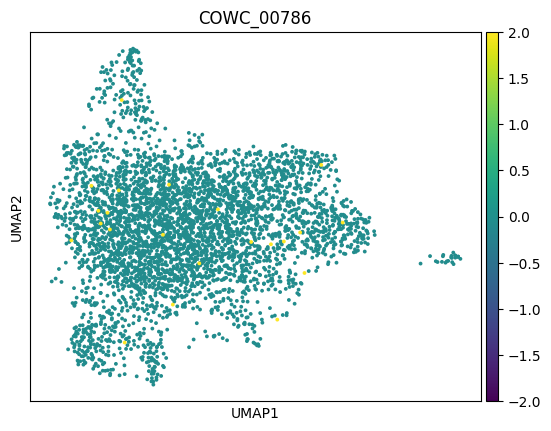

In [72]:
sc.pl.umap(adata,color="COWC_00786",use_raw=False,vmin=-2,vmax=2)

In [8]:
matrix_file = "/Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/filtered_feature_bc_matrix.h5"
matrix_directory="/Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/filtered_feature_bc_matrix"

mdata = sc.read_10x_h5(matrix_file)

#mdata.var_names_make_unique()
#mdata

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/filtered_feature_bc_matrix.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [105]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 11232 × 18957
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

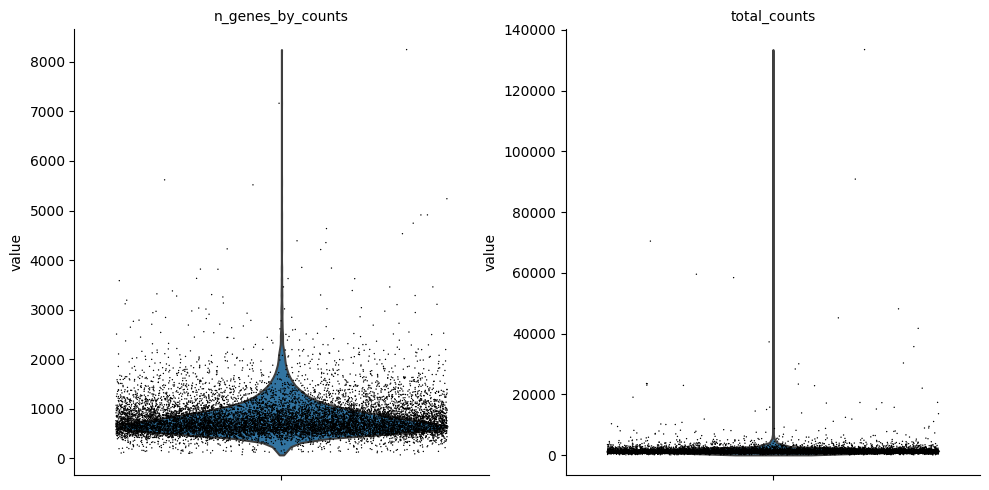

In [107]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True)
mu.pp.filter_var(rna, 'n_cells_by_counts', lambda x: x >= 5)
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))

mu.pp.filter_obs(rna, 'total_counts', lambda x: x < 20000)

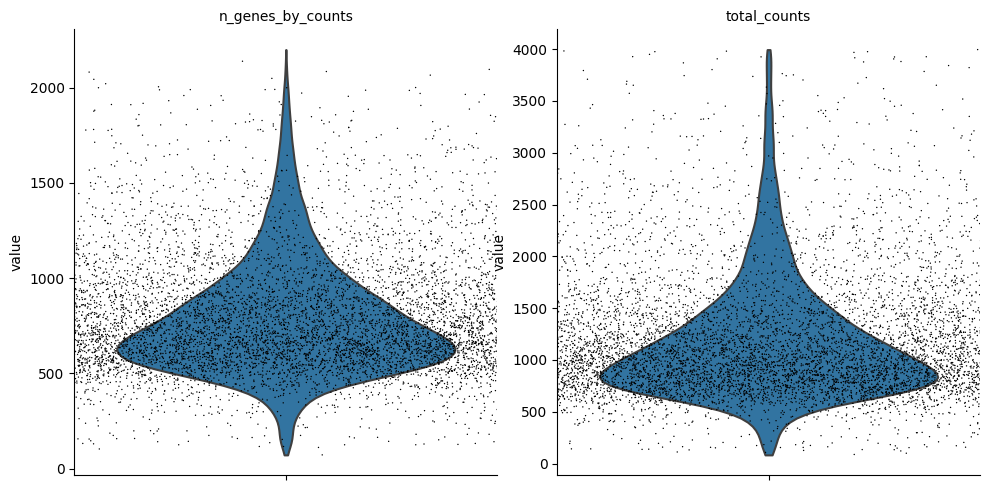

In [38]:
mu.pp.filter_var(rna, 'n_cells_by_counts', lambda x: x >= 5)
# mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: x < 8000)

mu.pp.filter_obs(rna, 'total_counts', lambda x: x < 4000)

sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts'],jitter=0.8, multi_panel=True)

In [108]:
rna

AnnData object with n_obs × n_vars = 11132 × 14007
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

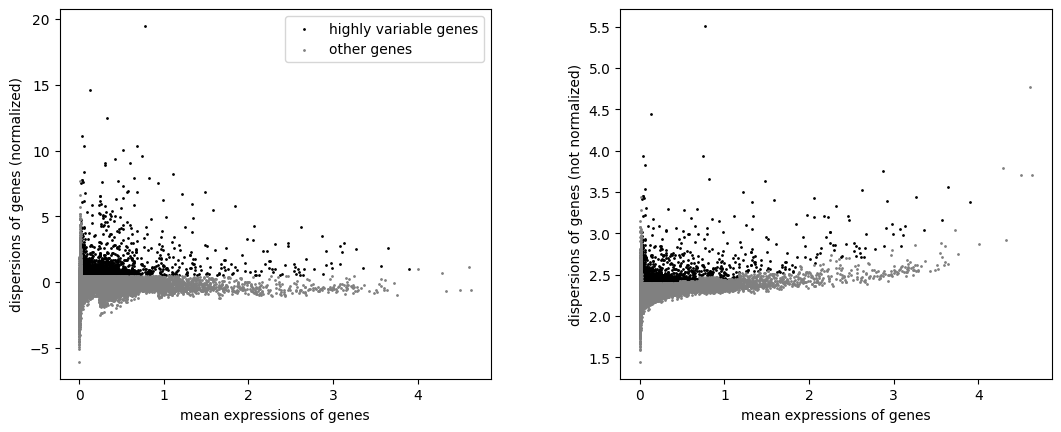

In [109]:
#normalisation
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
#feature selection
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)
sc.pl.highly_variable_genes(rna)

In [110]:
np.sum(rna.var.highly_variable)
rna.raw = rna
sc.pp.scale(rna, max_value=2)

Analysis

In [111]:
sc.tl.pca(rna, svd_solver='arpack')

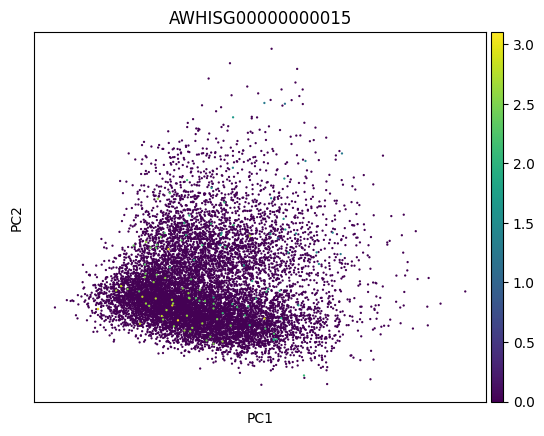

In [112]:
sc.pl.pca(rna, color="AWHISG00000000015")

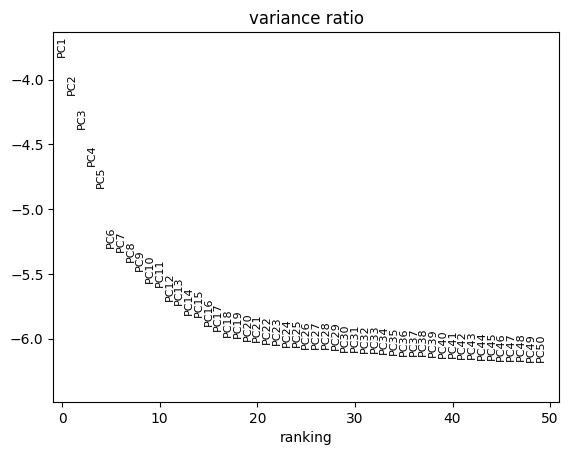

In [113]:
sc.pl.pca_variance_ratio(rna, log=True,n_pcs=50)

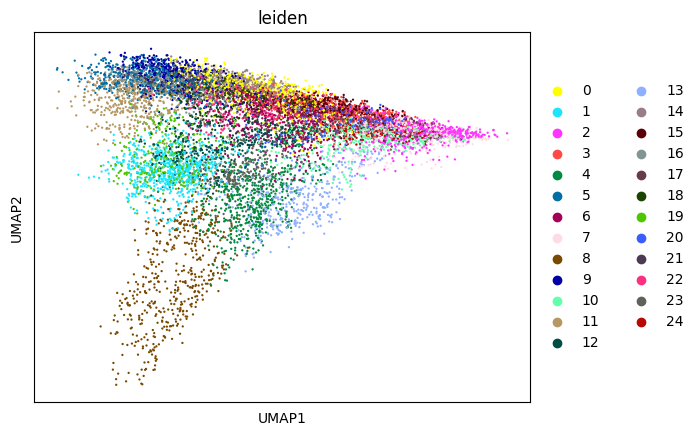

In [136]:
sc.pp.neighbors(rna,n_neighbors=10, n_pcs=3)

sc.tl.leiden(rna)
sc.tl.umap(rna)
sc.pl.umap(rna, color="leiden", legend_loc="right margin")

ATAC

In [134]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

import muon as mu

# Import a module with ATAC-seq-related functions
from muon import atac as ac
mdata = mu.read_10x_h5("/Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/filtered_feature_bc_matrix.h5")

atac = mdata.mod['atac']

Added `interval` annotation for features from /Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/filtered_feature_bc_matrix.h5
Located fragments file: /Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/atac_fragments.tsv.gz


/Users/carolinaatria/Library/Python/3.9/lib/python/site-packages/muon/_atac/tools.py:728: UserWarning: Peak annotation from /Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/atac_peak_annotation.tsv could not be added. Please check the annotation file is formatted correctly.
  warn(


In [224]:
mdata

MuData object with n_obs × n_vars = 11232 × 47798
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11232 x 18957
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11232 x 28841
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'files'

In [137]:
mu.atac.tl.locate_genome(atac,fasta_file="/Users/carolinaatria/Desktop/ADesktop/Studium/PhD/data.nosync/abeoforma_whisleri/genome/abeoforma_genome_barcelona/Abeoforma_genome_v2.fasta")
mu.atac.tl.locate_fragments(atac,fragments="/Users/carolinaatria/Desktop/ADesktop/Studium/PhD/unicellulars/abeoforma/atac_fragments.tsv.gz")
#features

In [141]:
mu.atac.tl.nucleosome_signal(atac)

Reading Fragments:   0%|          | 0/112320000 [00:00<?, ?it/s]

Reading Fragments: 100%|██████████| 112320000/112320000 [04:47<00:00, 390850.09it/s]


In [140]:
mu.pl.fragment_histogram(atac)

AttributeError: module 'muon._core.plot' has no attribute 'fragment_histogram'

In [227]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x >= 10) #to filter out peaks, where no expression is detected
mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x >= 2000) & (x <= 15000)) #to filter cells
mu.pp.filter_obs(atac, 'total_counts', lambda x: (x >= 4000) & (x <= 40000)) #to filter cells


In [228]:
atac

AnnData object with n_obs × n_vars = 10090 × 28819
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'files'

In [230]:
tss = ac.tl.tss_enrichment(atac, n_tss=1000)  # by default, features=ac.tl.get_gene_annotation_from_rna(mdata)

ValueError: Argument `features` is required. It should be a BED-like DataFrame with gene coordinates and names.